## 2021 Kaggle Machine Learning & Data Science Survey

### Prologue

I am a **45+ years woman** in the technology space for over 2 decades and in the data science and machine learning domain for around 3 years. In the last 20 or so years, I have been encountering lesser and lesser women around me in the technology space in general. This number dwindles further when it comes to data science and machine learning space. I am curious 🤔...curious to know how the **Women >40years** practitioners are faring in the ML and DS field! 

Let's compare the characteristics of **Women >40years** practitioners with the **overall members** and the **Women <40years** in each of the aspects - like demographices and the usage of technology (tools, products, libraries)

#### Imports

In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

#### Functions

In [2]:
df_RESULT = pd.DataFrame()

In [3]:
def percent(val, total):
    return round(100 * val/total, 2)

In [4]:
# Helper functions
def printCols(cat, cols, cols_top3, cols_other, cols_none):
    print(f"COLS_{cat}       {len(cols):2d}", end=': ');          [print(col[0], end=', ') for col in cols]; print()
    print(f"COLS_{cat}_TOP3  {len(cols_top3):2d}", end=': ');     [print(col, end=', ') for col in cols_top3]; print()
    print(f"COLS_{cat}_OTHER {len(cols_other):2d}", end=': ');    [print(col[0], end=', ') for col in cols_other]; print()
    print(f"COLS_{cat}_NONE  {len(cols_none):2d}", end=': ');     [print(col[0], end=', ') for col in cols_none]; print()

def getCols(cat, colprefix,colnone):
    PREFIX_LEN = len(colprefix)
    COLS_NONE = list(filter(lambda x: True if x[0]==colnone else False, df.columns.to_list()))
    COLS = list(filter(lambda x: True if x[0][:PREFIX_LEN]==colprefix and x not in COLS_NONE else False, df.columns.to_list()))
    COLS_TOP3    = [x[0] for x in df[COLS].count().sort_values(ascending=False).index[:3].values]
    COLS_OTHER   = list(filter(lambda x: True if x[0] not in COLS_TOP3 else False, COLS))
    #printCols(cat, COLS, COLS_TOP3, COLS_OTHER, COLS_NONE)
    return COLS, COLS_TOP3, COLS_OTHER, COLS_NONE
    
def convert2percent(df, col, total_col):
    df[col] = df[col]/ df[total_col]
    return df[col].apply(lambda x: round(x*100,2))

# Inplace of column with string values, create a new column with 1s & 0s 
# Old: df[('Q7_Part_1', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python')] = 'Python'
# New: df['Python'] = 1
def createNewCol(df_old, oldCol, df_new, newCol, value):
    df_new[newCol] = df_old[oldCol]
    # strip the value of the leading and trailing empty spaces
    df_new.loc[~df_new[newCol].isnull(), newCol] = df_new[~df_new[newCol].isnull()][newCol].apply(lambda x: x.strip())
    return  df_new[newCol].apply(lambda x: 1 if x== value else 0)

# Create a dataframe with overall and specific category values. Plot a bar graph to compare 
def compare(df, df_overall, df_specific, cat_other, col_other, ax, title=''):
    # Create a df with the overall users as percentage
    df_all = pd.DataFrame()
    df_all.loc['Count','Overall']=df.shape[0]
    df_all = pd.concat([df_all, df_specific])
    df_all.loc[cat_other,'Overall']=df_all.loc[cat_other,'Overall']/len(col_other)
    df_all['Overall'] = df_all['Overall'].apply(lambda x: round((x/df.shape[0])*100,2))
    #df_pl_all

    # Create different df for woman < 40 and woman > 40
    df_woman_lt40 = df_overall.loc[('<40', 'Woman'),:].to_frame()#; print("df_pl_woman_lt40\n", df_pl_woman_lt40);print()
    df_woman_gt40 = df_overall.loc[('>40', 'Woman'),:].to_frame()#; print("df_pl_woman_gt40\n", df_pl_woman_gt40)

    # Concatenate the overall and the woman < 40 and woman > 40 data 
    df_temp = pd.concat([df_all, df_woman_lt40, df_woman_gt40], axis=1, join='inner') 
    #print(df_temp)
    df_temp.drop('Count', inplace=True)
    ax = df_temp.plot.bar( ylim=(0,100), ax=ax);annotate(ax, title) #figsize=(15, 6),
    return df_temp

# This uses seaborn library to plot the bar plot and udpates the dataframe accordingly
def compare_sb(df, df_summary, df_temp, cat_other, col_other, ax, title=''):
    othercol = cat_other
    #print("df_temp- before\n", othercol, df_temp)

    df_temp['Count'] = df_temp['Overall'].apply(lambda x: round((x/df.shape[0])*100,2))
    df_temp['Age-Group'] = 'Overall'
    df_temp.reset_index(inplace=True)
    df_temp.rename(columns={'index':'Category'}, inplace=True)
    #print(df_temp[df_temp['Category']==othercol]['Count'] )
    df_temp.loc[df_temp['Category']==othercol,'Count'] = df_temp[df_temp['Category']==othercol]['Count'].apply(lambda x: round(x/len(COLS_OTHER),2))
    df_temp.drop(columns=['Overall'], inplace=True)
    #print("df_temp - after\n", df_temp)

    df_summary = df_summary.drop(columns='Count').stack().reset_index()
    df_summary.rename(columns={'level_2':'Category', 0:'Count'}, inplace=True)
    df_summary = df_summary[df_summary['Gender']=='Woman']
    df_summary['Age-Group'] = df_summary[['AgeGroup', 'Gender']].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
    df_summary.drop(columns=['AgeGroup','Gender'],inplace=True)
    df_summary = pd.concat([df_temp, df_summary])
    #print(df_summary)

    #plt.figure(figsize=(15,6))
    ax = sns.barplot(x='Category', y='Count', hue='Age-Group', data=df_summary)
    ax.set_title(title); ax.set_xlabel(''); ax.set_ylabel(''); ax.set_ylim([0, 100])
    for i in range(3):
        #ax.bar_label(ax.containers[i], fmt='%.1f%')
        ax.bar_label(container = ax.containers[i], labels = [f'{value:2.1f}%' for value in ax.containers[i].datavalues])

# Create a dataframe with users wrt Age-group and Gender 
def createSpecificAndSummary(df,topcol1, topcol2, topcol3, othercol, nonecol, othercols):
    df_temp = df.agg({topcol1:np.sum,topcol2:np.sum,topcol3:np.sum, othercol:np.sum, nonecol:np.sum}).to_frame()
    df_temp.rename(columns={0:"Overall"}, inplace=True)
    #print(df_temp)

    df_summary = df.groupby(by=['AgeGroup','Gender']).agg({'AgeGroup':'count',topcol1:np.sum,topcol2:np.sum,topcol3:np.sum, othercol:np.sum, nonecol:np.sum})
    df_summary.rename(columns={"AgeGroup":"Count"}, inplace=True)

    df_summary[topcol1] = convert2percent(df_summary,topcol1,"Count")
    df_summary[topcol2] = convert2percent(df_summary,topcol2,"Count")
    df_summary[topcol3] = convert2percent(df_summary,topcol3,"Count")

    df_summary[othercol]  = df_summary[othercol]/ df_summary["Count"]
    df_summary[othercol]  = df_summary[othercol].apply(lambda x: round(x*100/len(othercols),2))

    df_summary[nonecol]   = convert2percent(df_summary,nonecol,"Count")
    df_summary['Count']   = df_summary['Count'].apply(lambda x: round((x/df.shape[0])*100,2))
    return df_temp, df_summary

# Summarise the values of the category - total, top 3 values, other & none
def summarise(df, df_new, cat, cols, cols_other, col_none, 
                        top1col1, top1col2, top1val, 
                        top2col1, top2col2, top2val, 
                        top3col1, top3col2, top3val, ax=None, title=""):

    COL_COUNT, COL_OTHER, COL_NONE = f'{cat}-Count', f'{cat}-Other', f'{cat}-None'

    df_new[COL_COUNT]  = df[cols].count(axis=1)
    df_new[top1col2]   = createNewCol(df, top1col1 , df_new, top1col2, top1val)
    df_new[top2col2]   = createNewCol(df, top2col1 , df_new, top2col2, top2val)
    df_new[top3col2]   = createNewCol(df, top3col1 , df_new, top3col2, top3val)
    df_new[COL_NONE]   = createNewCol(df, col_none, df_new, COL_NONE, "None")
    df_new[COL_OTHER]  = df[cols_other].count(axis=1) 
    df_new[COL_COUNT]  = df[cols].count(axis=1) # None is not considered

    # Fill None for rows where no option was selected
    #print("BEFORE", df_new[(df_new[COL_COUNT]==0)][COL_COUNT].sum(), df_new[COL_NONE].sum())
    df_new.loc[(df_new[COL_COUNT]==0) & (df_new[COL_NONE]==0), COL_NONE] = 1
    #print("AFTER", df_new[COL_NONE].sum())

    #print(df_new.head())
    # Update the median and max values in the df_RESULT
    df_RESULT.loc[cat,'Count-Median'] = df_new[COL_COUNT].median()
    df_RESULT.loc[cat,'W<40-Median'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='<40')][COL_COUNT].median()
    df_RESULT.loc[cat,'W>40-Median'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='>40')][COL_COUNT].median()
    df_RESULT.loc[cat,'Count-Max'] = df_new[COL_COUNT].max()
    df_RESULT.loc[cat,'W<40-Max'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='<40')][COL_COUNT].max()
    df_RESULT.loc[cat,'W>40-Max'] =df_new[(df_new['Gender']=='Woman')&(df_new['AgeGroup']=='>40')][COL_COUNT].max()

    # Create a df with the IDE and total number of IDE users
    df_temp, df_summary = createSpecificAndSummary(df_new, top1col2, top2col2, top3col2, COL_OTHER, COL_NONE, cols_other)

    #df_ = compare(df, df_summary, df_temp, COL_OTHER, cols_other, ax, title)
    df_ = compare_sb(df, df_summary, df_temp, COL_OTHER, cols_other, ax, title)
    #plotBox(df_new, COL_COUNT)  
    return df_#, df_temp, df_summary     

##### Visulisations

In [5]:
def plotBox(df, col):
    df_man = df[df['Gender']=='Man'][['AgeGroup', col]]#;print(df_man.head())
    df_woman = df[df['Gender']=='Woman'][['AgeGroup', col]]#;print(df_woman.head())
    plt.figure(figsize=(18, 5), dpi=80)

    ax = plt.subplot(1, 4, 1); df_woman[df_woman['AgeGroup']=='<40'].hist(ax=ax); plt.title('Woman < 40')
    ax = plt.subplot(1, 4, 2); df_woman[df_woman['AgeGroup']=='>40'].hist(ax=ax); plt.title('Woman > 40') 
    ax = plt.subplot(1, 4, 3); df_man.boxplot(by='AgeGroup', ax=ax); ax.set_title('Man')        
    ax = plt.subplot(1, 4, 4); df_woman.boxplot(by='AgeGroup',ax=ax); ax.set_title('Woman') 

def plotSankey(nodes, links, title, width, height):
    data = go.Sankey(node = nodes, link = links)
    fig = go.Figure(data)
    fig.update_layout(title=title,  font_size=16, width=width,height=height,)
    fig.show()

def showTreeMap(df, tree, values, title):
    fig = px.treemap(df, path=[px.Constant("all")] + tree, values=values,     
                    color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
    fig.update_traces(root_color="lightgrey")
    #fig.update_traces(hovertemplate=)
    fig.update_layout(title=title,  margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

def annotate(ax, title='', strformat='', divideby=1):
    # Annotate
    for p in ax.patches:
        # format(, '.1f')
        value = p.get_height()/divideby
        ax.annotate(f"{value:.1f}{strformat}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    ax.set_title(title)

#### Read dataset

In [6]:
df = pd.read_csv('data/kaggle_survey_2021_responses.csv', header=[0,1])

/Users/sreedevigattu/sree/projects/mlds/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (195,201) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Columns: 369 entries, ('Time from Start to Finish (seconds)', 'Duration (in seconds)') to ('Q38_B_OTHER', 'In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other')
dtypes: float64(8), int64(1), object(360)
memory usage: 73.1+ MB


In [8]:
print(df.columns.tolist()[0:10])

[('Time from Start to Finish (seconds)', 'Duration (in seconds)'), ('Q1', 'What is your age (# years)?'), ('Q2', 'What is your gender? - Selected Choice'), ('Q3', 'In which country do you currently reside?'), ('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'), ('Q5', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'), ('Q6', 'For how many years have you been writing code and/or programming?'), ('Q7_Part_1', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'), ('Q7_Part_2', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R'), ('Q7_Part_3', 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL')]


In [9]:
df.iloc[0,:].to_frame().to_csv("Columns.csv")

<AxesSubplot:>

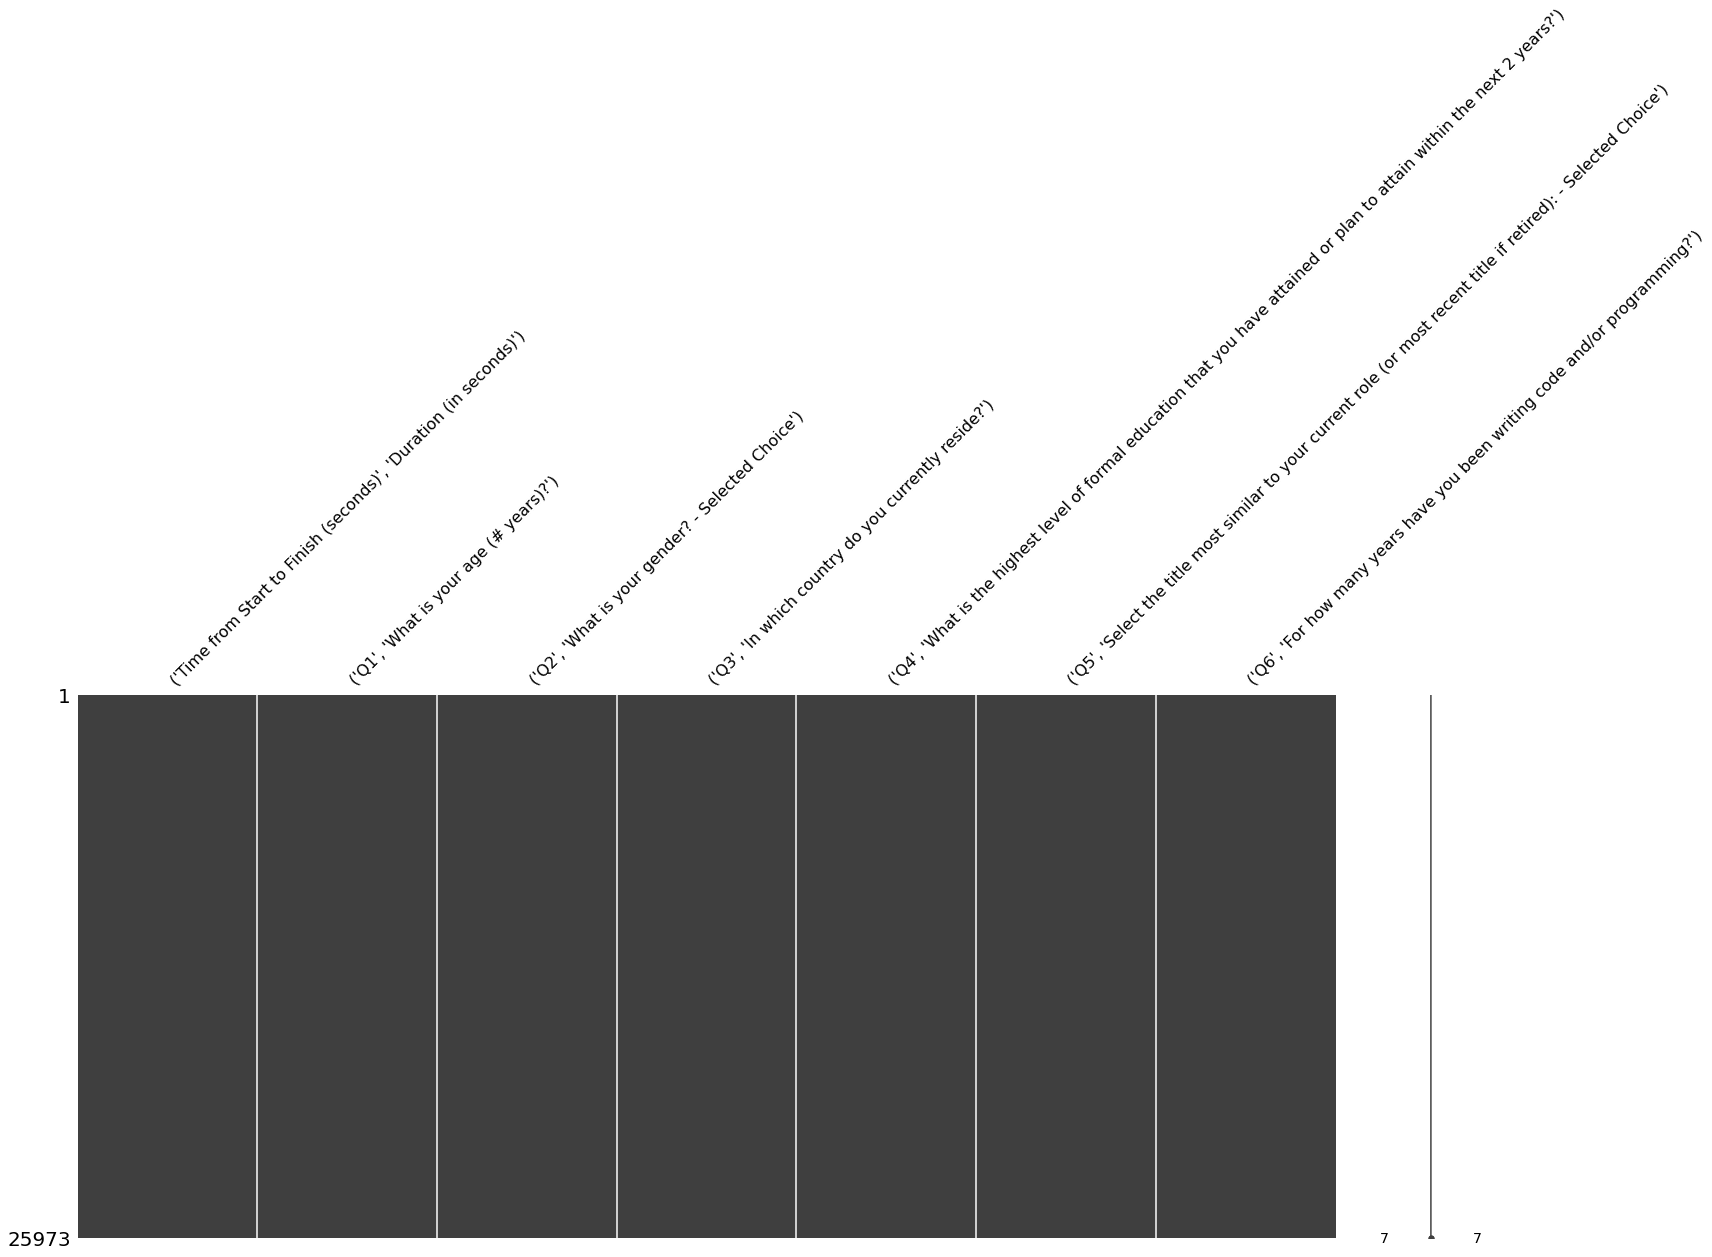

In [10]:
msno.matrix(df.iloc[:,:7])

#### Age and Gender - Data processing

In [11]:
df_new = pd.DataFrame()
df_new['Age']       = df['Q1', 'What is your age (# years)?']
df_new['Gender']    = df['Q2', 'What is your gender? - Selected Choice']
df_new['Country']   = df['Q3', 'In which country do you currently reside?']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Age      25973 non-null  object
 1   Gender   25973 non-null  object
 2   Country  25973 non-null  object
dtypes: object(3)
memory usage: 608.9+ KB


In [12]:
df_new.groupby(by='Age').agg({"Age":'count'}).rename(columns={'Age':'Count'}).reset_index(inplace=True)
print(df_new['Gender'].value_counts())
print(df_new.head())

Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: Gender, dtype: int64
     Age Gender    Country
0  50-54    Man      India
1  50-54    Man  Indonesia
2  22-24    Man   Pakistan
3  45-49    Man     Mexico
4  45-49    Man      India


In [13]:
df_new['Gender'] = df_new['Gender'].apply(lambda x: x if x in ['Man', 'Woman'] else 'Other')
df_new["AgeGroup"] = df_new['Age'].apply(lambda x: '<40' if x in ['18-21', '22-24', '25-29', '30-34', '35-39'] else '>40')
df_new.head()

,Age,Gender,Country,AgeGroup
0,50-54,Man,India,>40
1,50-54,Man,Indonesia,>40
2,22-24,Man,Pakistan,<40
3,45-49,Man,Mexico,>40
4,45-49,Man,India,>40


In [14]:
COLS_GENDER = ['Man', 'Woman', 'Other']
COLS_AGE = ['18-29','30-39','40-49','50-59','60-69','70+']
COLOR_MAP_GENDER = {'(?)':'lightgrey', 'Man':'dodgerblue', 'Woman':'lightcoral', 'Other':'gold'}

def getAgeGenderPivotDF():
    COLS_18_29, COLS_30_39, COLS_40_49, COLS_50_59 = ['18-21', '22-24', '25-29'], ['30-34','35-39'], ['40-44','45-49'], ['50-54','55-59']

    df_ = df_new.groupby(by=['Age','Gender']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
    df_.reset_index(inplace=True)
    #print(df_.head())

    df_summary = pd.pivot_table(data = df_,  values='Count', index=['Age'], columns=['Gender'], aggfunc=np.sum, fill_value=0)
    df_summary = df_summary[COLS_GENDER]

    #print(df_summary)
    df_summary.loc['18-29',COLS_GENDER ] = df_summary.loc[COLS_18_29, COLS_GENDER].sum(); df_summary.drop(index=COLS_18_29, inplace=True)
    df_summary.loc['30-39',COLS_GENDER ] = df_summary.loc[COLS_30_39, COLS_GENDER].sum(); df_summary.drop(index=COLS_30_39, inplace=True)
    df_summary.loc['40-49',COLS_GENDER ] = df_summary.loc[COLS_40_49, COLS_GENDER].sum(); df_summary.drop(index=COLS_40_49, inplace=True)
    df_summary.loc['50-59',COLS_GENDER ] = df_summary.loc[COLS_50_59, COLS_GENDER].sum(); df_summary.drop(index=COLS_50_59, inplace=True)
    df_summary = df_summary.reindex(index = COLS_AGE)
    df_summary['Count'] = df_summary['Man'] + df_summary['Woman'] + df_summary['Other']
    df_summary.reset_index(inplace=True)
    df_summary["AgeGroup"] = df_summary['Age'].apply(lambda x: '<40' if x in ['18-29','30-39'] else '>40')
    print(df_summary)
    return df_summary

def plotAgeGenderSankey(df):
    LABELS  = [ f'[{age}]yrs-{gender}' for age in COLS_AGE for gender in COLS_GENDER  ]#; print(LABELS[0:3])
    VALUES  = [ int(df[df['Age']==age][col].values[0]) for age in COLS_AGE for col in COLS_GENDER ]#;print(VALUES)
    NODES   = dict( label = [f'{col} yrs' for col in COLS_AGE] + COLS_GENDER, hovertemplate=" ",
                    color = [ "seagreen",   "lightseagreen",   "tomato",  "orange",  "peru",    "brown"] + ['dodgerblue', 'lightcoral', 'gold'],
                    x     = [ 0.1]*6 + [1]*6,
                    y     = [ 0.15, 0.5, 0.7, 0.8, 0.9, .95,] + [0.3, 0.75, 0.9])
    LINKS   = dict( source = [0]*3 + [1]*3 + [2]*3 + [3]*3 + [4]*3 + [5]*3 + [6]*3, target = [ 6, 7, 8]*6, 
                    value =  VALUES, label = LABELS, hovertemplate="%{label}",     
                    color =  ["lightgreen"]*3 + ["paleturquoise"]*3 +["sandybrown"]*3 + ['khaki'] * 3 + ['moccasin']*3 + ['bisque']*3)        
    plotSankey(NODES, LINKS, "Age & Gender - What is the distribution?", 1000, 600)
    # Colors are at https://developer.mozilla.org/en-US/docs/Web/CSS/color_value

def getAgeGenderDF():
    df_ = df_new.groupby(by=['Age','Gender','AgeGroup']).agg({'Gender':'count'}).rename(columns={'Gender':'Count'})
    df_.reset_index(inplace=True)
    total = df_['Count'].sum()
    df_["Count"] = df_['Count'].apply(lambda x: percent(x, total))
    print(df_.head())
    return df_

In [15]:
def showTreeMap(df, tree, values, title, width, height):
    fig = px.treemap(df, path=[px.Constant("all")] + tree, values=values,  
                    color='Gender', color_discrete_map={'(?)':'lightgrey', 'Man':'dodgerblue', 'Woman':'lightcoral', 'Other':'gold'})
    fig.update_traces(root_color="lightgrey")
    #fig.update_traces(values=values, hovertemplate='{values}')
    fig.update_layout(title=title,  width=width, height=height, margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

def plotTreeMapSP(df, tree, values, color, colors, fig, row, col):
    subfig = px.treemap(df, path=[px.Constant("all")] + tree, values=values, color=color, color_discrete_map=colors)
    print(type(subfig.data[0]))
    subfig.update_traces(root_color="lightgrey")
    #subfig.update_traces(values=df[values], hovertemplate='{values}')
    subfig.update_layout(width=600, height=400, margin = dict(t=50, l=25, r=25, b=25))
    fig.add_trace(subfig.data[0], row=row, col=col)
    return fig

def plotLineSP(df, x, y, color, colormap, fig, row, col, w, h):
    subfig = px.line(df, x=x, y=y, color=color, color_discrete_map=colormap)
    subfig.update_traces(mode="markers+lines", hovertemplate=None)
    #subfig.update_layout(width=w, height=h, margin = dict(t=50, l=25, r=25, b=25))
    for data in subfig.data:
        fig.add_trace(data, row=row, col=col)
    return fig

def plotLine(df, x, y, color, colormap, title):#, fig, row, col, w, h):
    fig = px.line(df, x=x, y=y, color=color, color_discrete_map=colormap)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(title=title, width=600, height=400, margin = dict(t=50, l=25, r=25, b=25))
    fig.show()
    return fig

def plotTreeMapLine(df):
    print(df.groupby(by=['AgeGroup','Gender']).agg({'Count':np.sum}))
    fig = make_subplots( cols = 2, rows = 1, column_widths = [0.4, 0.4],
                        subplot_titles = ('<b>Age & Gender - What is the distribution?<br />&nbsp;<br />', '<b>Age & number of members<br />&nbsp;<br />'),
                        specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'Scatter'}]])
    fig = plotTreeMapSP(df, ['Age', 'Gender'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 1)
    fig = plotLineSP(df, 'Age', 'Count', 'Gender', COLOR_MAP_GENDER, fig, 1, 2, 600, 300 )
    fig.show()

## 1. Demographics

### 1.1 Age and Gender
How many men and women are distributed across various age groups? What percentage of members form the **Women >40years** group? Are there far more men in the technology space than women?

In [16]:
df_ = getAgeGenderPivotDF(); plotAgeGenderSankey(df_)
df_ = getAgeGenderDF(); plotTreeMapLine(df_)
showTreeMap(df_, ['AgeGroup', 'Gender'], 'Count',"Gender & Age Groups", 1000, 500)

Gender    Age      Man   Woman  Other    Count AgeGroup
0       18-29  11198.0  3074.0  254.0  14526.0      <40
1       30-39   4758.0  1073.0  114.0   5945.0      <40
2       40-49   2708.0   492.0   65.0   3265.0      >40
3       50-59   1320.0   208.0   28.0   1556.0      >40
4       60-69    504.0    35.0   14.0    553.0      >40
5         70+    110.0     8.0   10.0    128.0      >40


     Age Gender AgeGroup  Count
0  18-21    Man      <40  14.23
1  18-21  Other      <40   0.34
2  18-21  Woman      <40   4.30
3  22-24    Man      <40  14.03
4  22-24  Other      <40   0.34
                 Count
AgeGroup Gender       
<40      Man     61.44
         Other    1.42
         Woman   15.97
>40      Man     17.87
         Other    0.45
         Woman    2.85
<class 'plotly.graph_objs._treemap.Treemap'>


As we can see in each of the age groups, the number of women is far lesser than that of men. And with increase in age, the number of members (and women) involved in ML & DS is decreasing. A **minuscule 3%** of the total community forms the **>40 women** sub group.

A person who is 40+ years now in 2021 must have been born in the 1970s, graduated in the 1990s. These are the times when women are not known to be taking up technical areas of work. This probably explains why the women form a small part of the technical community in general and ML & DS community in specific. Moreover, the ML and DS has gained momentum in the early 2010s. That leaves even lesser opportunity for the women graduated in 1990s to get involved in this space. 

*Note: The 'Other' gender is lesser than Man & Woman but since 'Other' community is not the focus in the current analysis, ignoring it*

### 1.2 Country
Which countries do the women > 40 come from? How is this distribution comapred to the other categories?

In [17]:
def getAgeGenderCountryPivotDF():
    df_ = df_new.groupby(by=['AgeGroup','Gender','Country']).agg({'AgeGroup':'count'})
    df_.rename(columns={'AgeGroup':'Count'}, inplace=True)
    print(df_)

    df_summary = pd.pivot_table(df_, index=['Gender', 'AgeGroup'],columns = ['Country'], values ='Count', aggfunc=np.sum).loc[['Man','Woman'],TOP_COUNTRIES]
    print(df_summary)

    df_summary['Total'] = 0
    df_summary.loc[('Man','<40'), 'Total']   = df_.loc[('<40','Man'),:].sum().values[0] # / df.shape[0])*100
    df_summary.loc[('Man','>40'), 'Total']   = df_.loc[('>40','Man'),:].sum().values[0] #/ df.shape[0])*100 
    df_summary.loc[('Woman','<40'), 'Total'] = df_.loc[('<40','Woman'),:].sum().values[0] #/ df.shape[0])*100 
    df_summary.loc[('Woman','<40'), 'Total'] = df_.loc[('>40','Woman'),:].sum().values[0] #/ df.shape[0])*100
    df_summary = df_summary/ df.shape[0]*100 #.round(2)
    df_summary = df_summary.round(2)
    df_summary.reset_index(inplace=True)
    print(df_summary.head())
    return df_summary

def getAgeGenderCountryDF():
    df_ = df_new.groupby(by=['AgeGroup','Gender','Country']).agg({'AgeGroup':'count'})
    df_.rename(columns={'AgeGroup':'Count'}, inplace=True)
    total = df.shape[0]
    df_['Count'] = df_['Count'].apply(lambda x: percent(x, total)) 

    df_.reset_index(inplace=True)
    df_ = df_[df_['Country'].isin(TOP_COUNTRIES)]

    print(df_.head())
    return df_

def plotTreeMaps(df):
    fig = make_subplots(cols = 2, rows = 1, column_widths = [0.4, 0.4],
                    subplot_titles = ('<b>Gender, Age & Country - Distribution<br />&nbsp;<br />', '<b>Age Group, Country - Distribution of Women <br />&nbsp;<br />'),
                    specs = [[{'type': 'treemap', 'rowspan': 1}, {'type': 'treemap', 'rowspan': 1}]])
    fig = plotTreeMapSP(df, ['Gender', 'AgeGroup','Country'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 1)
    fig = plotTreeMapSP(df[df['Gender']=='Woman'], ['Gender', 'AgeGroup','Country'], 'Count', "Gender", COLOR_MAP_GENDER, fig, 1, 2)
    fig.show()

In [18]:
df_new.groupby(by='Country').agg({'Country':'count'}).rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)
TOP_COUNTRIES = df_new.groupby(by='Country').agg({'Country':'count'}).rename(columns={'Country':'Count'}).sort_values(by='Count', ascending=False)[:3].index.tolist()
print(TOP_COUNTRIES)
df_ = getAgeGenderCountryDF()
print(df_.groupby(by=['AgeGroup','Gender']).agg({'Count':np.sum}))
plotTreeMaps(df_)

['India', 'United States of America', 'Other']
   AgeGroup Gender                   Country  Count
23      <40    Man                     India  20.14
40      <40    Man                     Other   2.93
64      <40    Man  United States of America   4.27
82      <40  Other                     India   0.36
95      <40  Other                     Other   0.09
                 Count
AgeGroup Gender       
<40      Man     27.34
         Other    0.68
         Woman    8.28
>40      Man      5.90
         Other    0.21
         Woman    1.31
<class 'plotly.graph_objs._treemap.Treemap'>
<class 'plotly.graph_objs._treemap.Treemap'>


In the <40 years category, most members (including women) are coming from **India** while in the >40 years category, most members seem to be coming from **United States of America**

Since the environment in the **United States of America** became more conduicive for women earlier on, we probably see more women in the >40 category. But **India** seems to be fast catching up with the ML & DS technology!!

## 2. Education and Profession
What kind of **education** do the **Women > 40 years** have? Which **Industries** and in what kind og **Roles** do they mostly work in? What is the **Salaries** do they typically earn?

In [19]:
def getXXX(df_, cols, col):
    df_temp = df_[cols].groupby(by=[col]).agg({col: 'count'})
    df_temp.rename(columns={col:'count'}, inplace=True)
    df_temp['count'] = 100 * df_temp['count']/df_.shape[0]
    df_temp.reset_index(inplace=True)
    #print(df_temp)
    return df_temp

def getYYY(df_, col):
    cols = ['Age','Gender','AgeGroup',col]
    print("Missing values:", df_[col].isnull().sum())
    #print(df_[cols].head())

    df_all = getXXX(df_, cols, col)
    df_wlt40 = getXXX(df_[(df_new['Gender']=='Woman') & (df_['AgeGroup']=='<40')], cols, col)
    df_wgt40 = getXXX(df_[(df_new['Gender']=='Woman') & (df_['AgeGroup']=='>40')], cols, col)

    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(1, 3, 1); ax = df_all.plot.bar(col, ax=ax); annotate(ax, 'Overall'); ax.set_ylim(0, 100)
    ax = plt.subplot(1, 3, 2); ax = df_wlt40.plot.bar(col, ax=ax); annotate(ax, 'Woman < 40'); ax.set_ylim(0, 100)
    ax = plt.subplot(1, 3, 3); ax = df_wgt40.plot.bar(col, ax=ax); annotate(ax, 'Woman > 40'); ax.set_ylim(0, 100)
    fig.suptitle(f'{col} & Gender', fontsize=16)

Missing values: 0


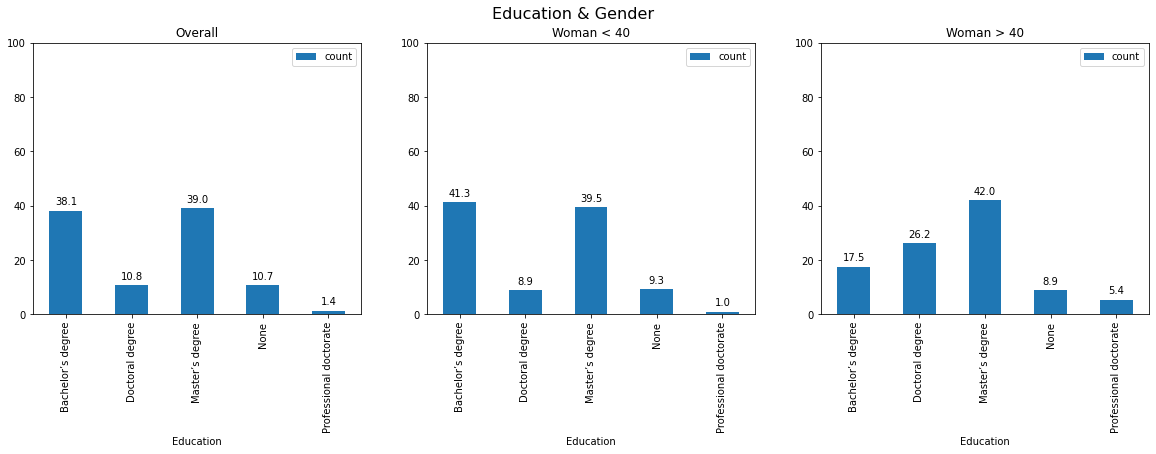

In [20]:
COLS_EDU = ('Q4', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')
df[COLS_EDU].value_counts(normalize=True)*100

df_new['Education'] = df[COLS_EDU].apply(lambda x: 'None' if x in ['I prefer not to answer','No formal education past high school', 'Some college/university study without earning a bachelor’s degree'] else x )
getYYY(df_new, 'Education')

Overall and Woman<40 categories, the members mostly have Bachelor's & Masters degree followed by No degree, Doctor, Professional Doctor

But **Women >40** have mostly **Masters degree** followed by Doctors, Bachelors, None and then Professional doctorate. This is probably expected due to the age factor.


Missing values: 0
Missing values: 0


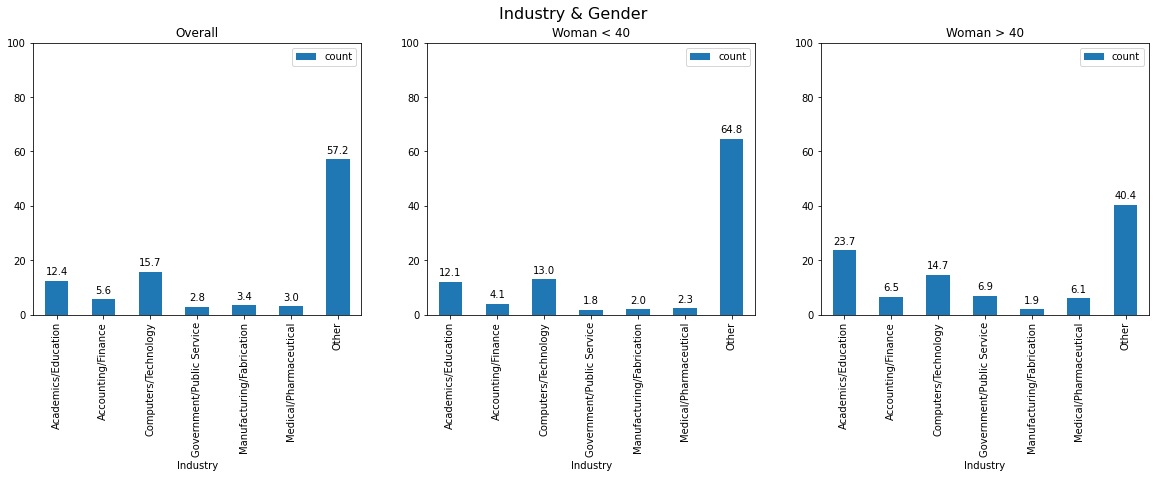

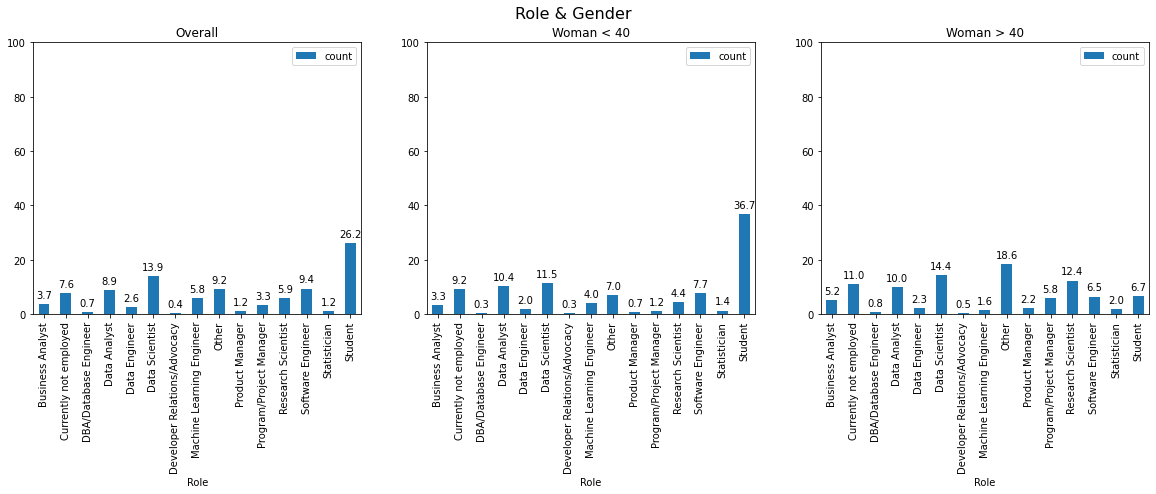

In [21]:
COLS_INDUSTRY = ('Q20', 'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice')
df[COLS_INDUSTRY].value_counts(normalize=True)*100;print()
df_new['Industry'] = df[COLS_INDUSTRY].apply(lambda x: x if x in ['Computers/Technology','Academics/Education', 'Accounting/Finance', 'Manufacturing/Fabrication', 'Medical/Pharmaceutical', 'Government/Public Service'] else 'Other' )
getYYY(df_new, 'Industry')

COLS_ROLE = ('Q5', 'Select the title most similar to your current role (or most recent title if retired): - Selected Choice')
df[COLS_ROLE].value_counts(normalize=True)*100
df_new['Role'] = df[COLS_ROLE]
getYYY(df_new, 'Role')

Higher percentage of the women > 40yrs are in the Academics/Education (other than 'Others' category) followed by Computers/Technology. These are also the top 2 industries for the overall and women < 40 yrs but with lesser percentages.

While in the Overall & Women < 40 years categories, most of them are students followed by Data Scientists, the women>40 years fall in the Data Scientist, Research Scientist roles (apart from Other category)

Missing values: 10582


(0.0, 18.0)

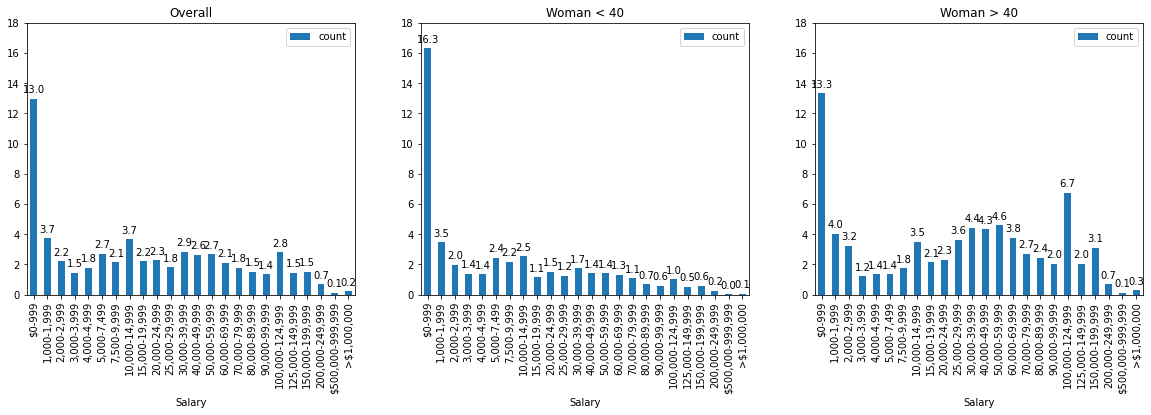

In [22]:
COLS_SAL = ('Q25', 'What is your current yearly compensation (approximate $USD)?')
df[COLS_SAL].value_counts(normalize=True).sort_values(ascending=False)
df_new['Salary'] = df[COLS_SAL]
#getYYY(df_new, 'Salary')

col = 'Salary'
cols = ['Age','Gender','AgeGroup',col]
print("Missing values:", df_new[col].isnull().sum())
#print(df_[cols].head())

SAL_VALUES = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999','10,000-14,999', '15,000-19,999', '20,000-24,999','25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999','200,000-249,999', '$500,000-999,999', '>$1,000,000']
df_ = df_new
total = df_.shape[0]
df_all = df_[cols].groupby(by=[col]).agg({col: 'count'})
df_all.rename(columns={col:'count'}, inplace=True)
df_all = df_all.reindex(SAL_VALUES)
df_all.reset_index(inplace=True)
df_all['count'] = round((df_all['count']/total)*100,2)
#print(df_all)

df_ = df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')]
total = df_.shape[0]
df_wlt40 = df_[cols].groupby(by=[col]).agg({col: 'count'})
df_wlt40.rename(columns={col:'count'}, inplace=True)
df_wlt40 = df_wlt40.reindex(SAL_VALUES)
df_wlt40.reset_index(inplace=True)
df_wlt40['count'] = round((df_wlt40['count']/total)*100,2)
#print(df_wlt40)


df_ = df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')]
total = df_.shape[0]
df_wgt40 = df_[cols].groupby(by=[col]).agg({col: 'count'})
df_wgt40.rename(columns={col:'count'}, inplace=True)
df_wgt40 = df_wgt40.reindex(SAL_VALUES)
df_wgt40.reset_index(inplace=True)
df_wgt40['count'] = round((df_wgt40['count']/total)*100,2)
#print(df_wgt40)

plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 3, 1); ax = df_all.plot.bar(col, ax=ax); annotate(ax, 'Overall'); ax.set_ylim(0, 18)
ax = plt.subplot(1, 3, 2); ax = df_wlt40.plot.bar(col, ax=ax); annotate(ax, 'Woman < 40'); ax.set_ylim(0, 18)
ax = plt.subplot(1, 3, 3); ax = df_wgt40.plot.bar(col, ax=ax); annotate(ax, 'Woman > 40'); ax.set_ylim(0, 18)

The salaries of the women > 40yrs is higher than their counterparts (owing to their experience)

## 3. Development Toolset/Environment - Usage
How have the **Women > 40 years** adopted Technology? How many of the Programming Languages, IDE, Tools, Frameworks do they use in their work?

### 3.1 Programming Languages

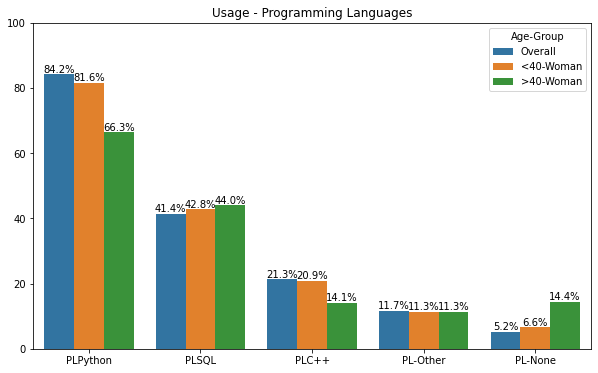

In [23]:
plt.figure(figsize=(10, 6)); ax = plt.subplot(1,1 ,1)
CAT = "PL"; Q_PREFIX = "Q7"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}12'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', f'{CAT}Python', "Python",
            f'{Q_PART_PREFIX}3', f'{CAT}SQL', "SQL",
            f'{Q_PART_PREFIX}5', f'{CAT}C++', "C++", ax, 'Usage - Programming Languages') 

The overall trend of usage of Programming Languages for the Woman > 40 is similar to overall and Woman <40. The most used programming languages are in the order Python, SQL, C++

The python users in the Woman >40 is lesser than the rest.

The number of women > 40 not using any programming language is 14.4 which is significantly higher than the overall and women<40 category.

In [24]:
'''print("cols", len(COLS_PL + COLS_PL_NONE))
print("Total rows: ", df.shape[0])
print("Rows with all COLS_PL + COLS_PL_NONE nulls:", df[df[COLS_PL + COLS_PL_NONE].isnull().sum(axis=1)==13].shape[0])
print("Rows with all COLS_PL nulls:", (df[df[COLS_PL].isnull().sum(axis=1)==12][COLS_PL_NONE]).shape[0]/df.shape[0]) #[COLS_PL_NONE].isnull().sum()
#print("XXX", df.loc[ df[COLS_PL].isnull().sum(axis=1)<12, : ][COLS_PL_NONE]=='None')
# print("Rows with all COLS_PL nulls:", df[(df[COLS_PL].isnull().sum(axis=1)==12)&(df[COLS_PL_NONE]=='None')].shape[0])

df_temp = df[df[COLS_PL].isnull().sum(axis=1)<12][COLS_PL_NONE]#)==True #][COLS_PL_NONE]
print(df_temp.shape[0])
df_temp[COLS_PL_NONE].value_counts()'''

'print("cols", len(COLS_PL + COLS_PL_NONE))\nprint("Total rows: ", df.shape[0])\nprint("Rows with all COLS_PL + COLS_PL_NONE nulls:", df[df[COLS_PL + COLS_PL_NONE].isnull().sum(axis=1)==13].shape[0])\nprint("Rows with all COLS_PL nulls:", (df[df[COLS_PL].isnull().sum(axis=1)==12][COLS_PL_NONE]).shape[0]/df.shape[0]) #[COLS_PL_NONE].isnull().sum()\n#print("XXX", df.loc[ df[COLS_PL].isnull().sum(axis=1)<12, : ][COLS_PL_NONE]==\'None\')\n# print("Rows with all COLS_PL nulls:", df[(df[COLS_PL].isnull().sum(axis=1)==12)&(df[COLS_PL_NONE]==\'None\')].shape[0])\n\ndf_temp = df[df[COLS_PL].isnull().sum(axis=1)<12][COLS_PL_NONE]#)==True #][COLS_PL_NONE]\nprint(df_temp.shape[0])\ndf_temp[COLS_PL_NONE].value_counts()'

In [25]:
'''print(df_new['PLPython'].sum(), df_new[df_new['PLPython']==0]['PLPython'].count(), df_new.shape[0])
def abc(label, lt40, gt40):
    print(f"{label:5}    <40: {percent(lt40,df.shape[0]):2.2f}%    >40: {percent(gt40,df.shape[0]):2.2f}%")

abc("Woman", 4147, 743)
abc("Man", 15956, 4642)'''

'print(df_new[\'PLPython\'].sum(), df_new[df_new[\'PLPython\']==0][\'PLPython\'].count(), df_new.shape[0])\ndef abc(label, lt40, gt40):\n    print(f"{label:5}    <40: {percent(lt40,df.shape[0]):2.2f}%    >40: {percent(gt40,df.shape[0]):2.2f}%")\n\nabc("Woman", 4147, 743)\nabc("Man", 15956, 4642)'

In [ ]:
'''def my_value_counts(df, col):
    df_ = df['ProgLang'].value_counts(normalize=True).to_frame()
    #print(df_pl_all)
    return df_

df_pl_all = my_value_counts(df_new, 'ProgLang') 
df_pl_man = my_value_counts(df_man, 'ProgLang') 
df_pl_woman =  my_value_counts(df_woman, 'df_woman')
df_pl_woman_lt40 =  my_value_counts(df_woman[df_woman['AgeGroup']=='<40'], 'ProgLang') 
df_pl_woman_gt40 =  my_value_counts(df_woman[df_woman['AgeGroup']=='>40'], 'ProgLang') 
df_res = pd.merge(df_pl_man, df_pl_woman, left_index=True, right_index=True,suffixes=['_m','_w'])
df_res = pd.merge(df_res, df_pl_woman_lt40, left_index=True, right_index=True)
df_res = pd.merge(df_res, df_pl_woman_gt40, left_index=True, right_index=True,suffixes=['_w_lt40','_w_gt40'])
df_res = pd.merge(df_pl_all, df_res, left_index=True, right_index=True)
round(df_res*100,1)
df_res.plot.bar(figsize=(15,5), logy=True)'''

### 3.2 IDEs & Hosted Notebooks

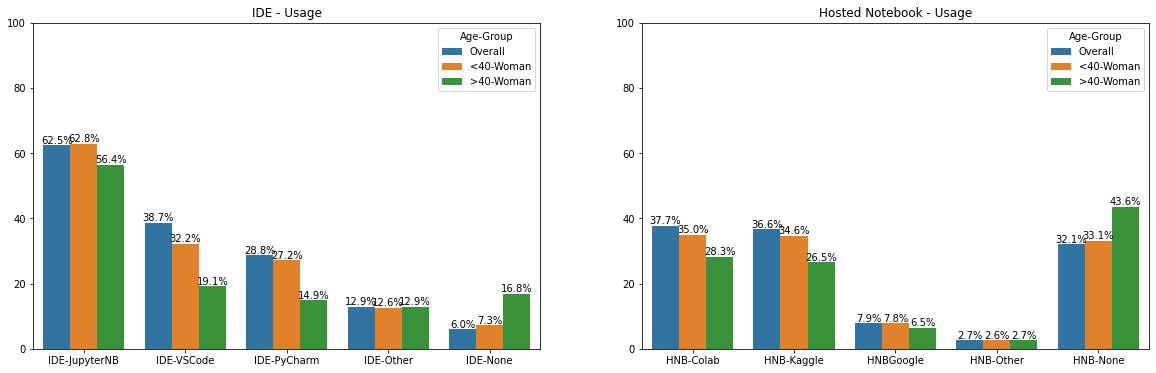

In [26]:
plt.figure(figsize=(20, 6))

CAT, Q_PREFIX = "IDE", "Q9"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}12'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
ax = plt.subplot(1, 2, 1)
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}11', f'{CAT}-JupyterNB', "Jupyter Notebook",
            f'{Q_PART_PREFIX}4', f'{CAT}-VSCode', "Visual Studio Code (VSCode)",
            f'{Q_PART_PREFIX}5', f'{CAT}-PyCharm', "PyCharm", 
            ax=ax, title="IDE - Usage") 

CAT, Q_PREFIX = "HNB", "Q10"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}16'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
ax = plt.subplot(1, 2, 2)
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}2', f'{CAT}-Colab', "Colab Notebooks",
            f'{Q_PART_PREFIX}1', f'{CAT}-Kaggle', "Kaggle Notebooks",
            f'{Q_PART_PREFIX}10', f'{CAT}Google', "Google Cloud Notebooks (AI Platform / Vertex AI)", 
            ax=ax, title="Hosted Notebook - Usage") 

The trend across categories in the **IDE** and **Hosted Notebook** usage is also similar. The most used IDEs are Jupyter Notebook, VS Code and PyCharm

The number of women > 40 not using any IDE and Hosted Notebook is 16.8 and 43.6 respectively which is again significantly higher than the overall and women<40 category.

### 3.3 Programming Language & Machine Learning Usage

In [27]:
COLS_ML_USE = ('Q15','For how many years have you used machine learning methods?')
print(df[COLS_ML_USE].value_counts(normalize=True)*100);print()

COLS_PL_USE = ('Q6', 'For how many years have you been writing code and/or programming?')
print(df[COLS_PL_USE].value_counts(normalize=True)*100)

df_new['MLUsage'] = df[COLS_ML_USE].apply(lambda x: '0 years' if x == 'I do not use machine learning methods' else x )
df_new['PLUsage'] = df[COLS_PL_USE].apply(lambda x: '0 years' if x == 'I have never written code' else x)

COLS_USAGE = ['Age','Gender','AgeGroup','PL-Count','MLUsage','PLUsage']
df_new[COLS_USAGE].head()

Under 1 year                             38.574556
1-2 years                                19.680896
I do not use machine learning methods    16.371979
2-3 years                                 9.703629
3-4 years                                 4.929696
5-10 years                                4.348741
4-5 years                                 3.978277
10-20 years                               1.523954
20 or more years                          0.888271
Name: (Q15, For how many years have you used machine learning methods?), dtype: float64

1-3 years                    30.316097
< 1 years                    22.642744
3-5 years                    15.635468
5-10 years                   11.931621
10-20 years                   8.339429
20+ years                     7.161283
I have never written code     3.973357
Name: (Q6, For how many years have you been writing code and/or programming?), dtype: float64


,Age,Gender,AgeGroup,PL-Count,MLUsage,PLUsage
0,50-54,Man,>40,2,5-10 years,5-10 years
1,50-54,Man,>40,4,Under 1 year,20+ years
2,22-24,Man,<40,3,0 years,1-3 years
3,45-49,Man,>40,1,5-10 years,20+ years
4,45-49,Man,>40,3,10-20 years,< 1 years


In [28]:
def plotMLPLUsage(df, ax, title):
    df.rename(columns={'MLUsage':'Count'},inplace=True)
    df.reset_index(inplace=True)
    #print(df.sort_values(by=['MLUsage','PLUsage']).head())
    #print(df[df['MLUsage'] == '20 or more years'])

    df_mlpl = pd.pivot_table(df, index=['PLUsage'], columns = ['MLUsage'], values ='Count', aggfunc=np.sum)
    df_mlpl = df_mlpl[['0 years', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years']]
    df_mlpl = df_mlpl.reindex(index = ['< 1 years', '1-3 years','3-5 years', '5-10 years', '10-20 years', '20+ years'] )
    
    #fig, ax = plt.subplots(figsize=(10,8)) 
    if ax is None: 
        sns.heatmap(df_mlpl, annot=True, fmt="g", cmap="YlGnBu")
    else:
        sns.heatmap(df_mlpl, annot=True, fmt="g", ax=ax, cmap="YlGnBu")

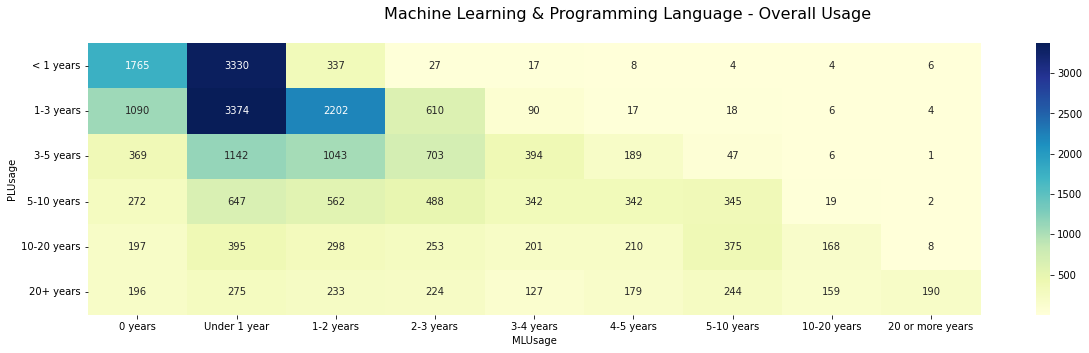

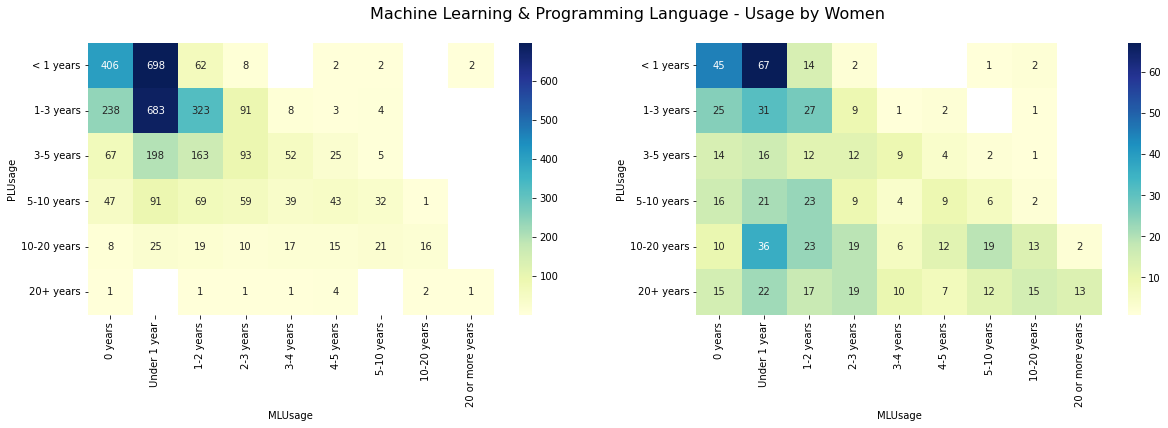

In [29]:
df_all = df_new[COLS_USAGE].groupby(by=['MLUsage','PLUsage']).agg({ 'MLUsage': 'count'})
df_wlt40 = df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='<40')][COLS_USAGE].groupby(by=['MLUsage','PLUsage']).agg({ 'MLUsage': 'count'})
df_wgt40 = df_new[(df_new['Gender']=='Woman') & (df_new['AgeGroup']=='>40')][COLS_USAGE].groupby(by=['MLUsage','PLUsage']).agg({ 'MLUsage': 'count'})

fig = plt.figure(figsize=(20, 5)); fig.suptitle('Machine Learning & Programming Language - Overall Usage', fontsize=16)
plotMLPLUsage(df_all, None, 'Overall');plt.show()

fig = plt.figure(figsize=(20, 5)); fig.suptitle('Machine Learning & Programming Language - Usage by Women', fontsize=16)
ax = plt.subplot(1, 2, 1); plotMLPLUsage(df_wlt40, ax, 'Woman < 40')
ax = plt.subplot(1, 2, 2); plotMLPLUsage(df_wgt40, ax, 'Woman > 40')

Most of the **overall** and **woman <40 years** communities have been using programming languages for **< 5 years** and have been using ML for **< 3 years**. Very few have been using Programming Languages and ML beyond these numbers.

For obvious reasons (age), more percentage of the  **woman > 40** community has been using programming languages and ML for more years compared to that of their counterparts.

### 3.4 Data Visualization & Machine Learning Framework

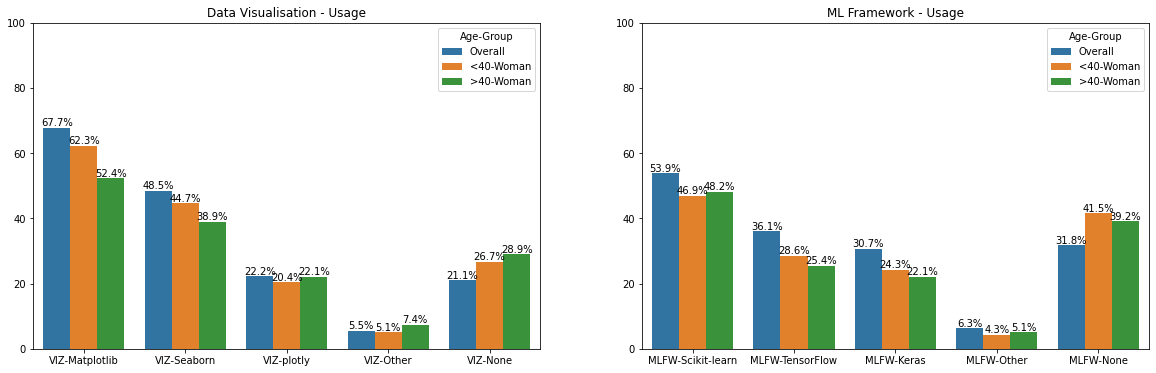

In [30]:
plt.figure(figsize=(20, 6))

CAT, Q_PREFIX = "VIZ", "Q14"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}11'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, );df[COLS].head()
ax = plt.subplot(1, 2, 1)
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', f'{CAT}-Matplotlib', "Matplotlib",
            f'{Q_PART_PREFIX}2', f'{CAT}-Seaborn', "Seaborn",
            f'{Q_PART_PREFIX}3', f'{CAT}-plotly', "Plotly / Plotly Express", 
            ax, "Data Visualisation - Usage")

CAT, Q_PREFIX = "MLFW", "Q16"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}17'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, );df[COLS].head()
ax = plt.subplot(1, 2, 2)
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', f'{CAT}-Scikit-learn', "Scikit-learn",
            f'{Q_PART_PREFIX}2', f'{CAT}-TensorFlow', "TensorFlow",
            f'{Q_PART_PREFIX}3', f'{CAT}-Keras', "Keras", 
            ax, "ML Framework - Usage")

In all the categories of gender and age groups, 
- matplotlib, seaborn, plotly are most used visualization libraries 
- scikit learn, tensorflow and keras are most used for general machine learning frameworks

## 4. Machine Learning Concepts, Practices - Usage
How is the usage of ML Algorithms and areas like Computer Vision, Natural Language Processing (NLP) & AutoML?

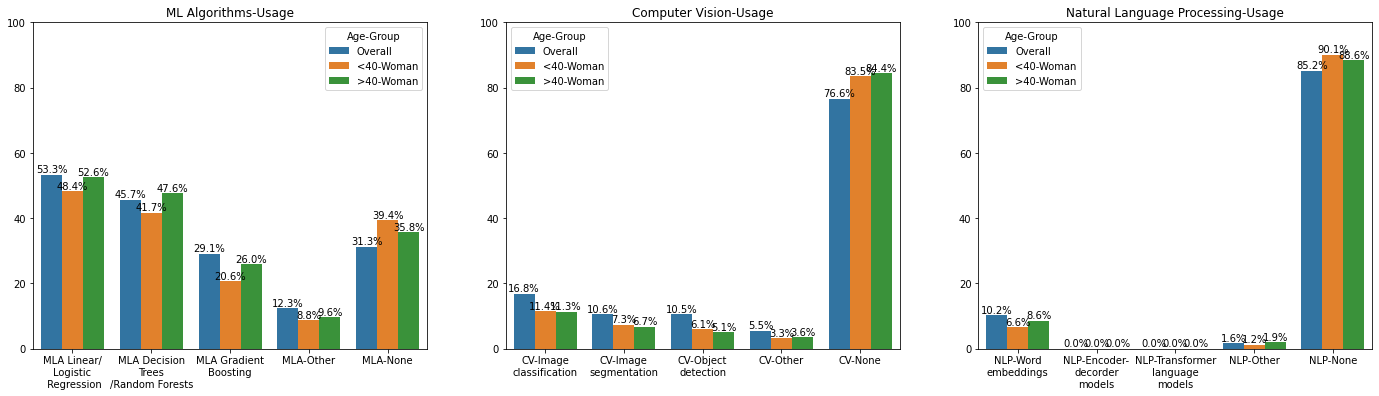

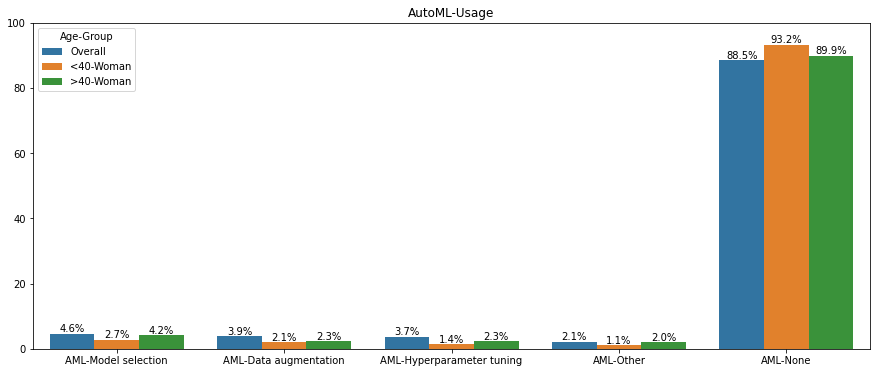

In [31]:
plt.figure(figsize=(24, 6))

ax = plt.subplot(1, 3, 1)
CAT, Q_PREFIX = "MLA", "Q17"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}11'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', f'{CAT} Linear/\nLogistic\n Regression', "Linear or Logistic Regression",
            f'{Q_PART_PREFIX}2', f'{CAT} Decision\nTrees\n/Random Forests', "Decision Trees or Random Forests",
            f'{Q_PART_PREFIX}3', f'{CAT} Gradient\nBoosting', "Gradient Boosting Machines (xgboost, lightgbm, etc)", ax=ax, title="ML Algorithms-Usage") 

ax = plt.subplot(1, 3, 2)
CAT, Q_PREFIX = "CV", "Q18"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}6'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}4', f'{CAT}-Image\nclassification', "Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)",
            f'{Q_PART_PREFIX}2', f'{CAT}-Image\nsegmentation', "Image segmentation methods (U-Net, Mask R-CNN, etc)",
            f'{Q_PART_PREFIX}3', f'{CAT}-Object\ndetection', "Object detection methods (YOLOv3, RetinaNet, etc)", ax=ax, title="Computer Vision-Usage") 

ax = plt.subplot(1, 3, 3)
CAT, Q_PREFIX  = "NLP", "Q19"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}5'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', f'{CAT}-Word\nembeddings', "Word embeddings/vectors (GLoVe, fastText, word2vec)",
            f'{Q_PART_PREFIX}4', f'{CAT}-Encoder-\ndecorder\nmodels', "Encoder-decorder models (seq2seq, vanilla transformers)",
            f'{Q_PART_PREFIX}2', f'{CAT}-Transformer\nlanguage\nmodels', "Transformer language models (GPT-3, BERT, XLnet, etc)", ax=ax, title="Natural Language Processing-Usage") 

plt.figure(figsize=(15, 6))

ax = plt.subplot(1, 1, 1)
CAT = "AML"; Q_PREFIX = "Q36_A"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}7'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}3', f'{CAT}-Model selection', "Automated model selection (e.g. auto-sklearn, xcessiv)",
            f'{Q_PART_PREFIX}1', f'{CAT}-Data augmentation', "Automated data augmentation (e.g. imgaug, albumentations)",
            f'{Q_PART_PREFIX}5', f'{CAT}-Hyperparameter tuning', "Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)", 
            ax, title='AutoML-Usage') 

The trend of usage of the ML algorithms, CV, NLP & AutoML are again same across all the gender-age group categories. A big percentage of the community have not started to use the higher order ML concepts like CV, NLP & AutoML

Interestingly in the usage of ML Algorithms, the **Women > 40 years** have a slight upper hand compared to their **<40 years** counterparts. 

## 5. Managed Platforms & Products - Usage
How is the adoption of the community to the Cloud hosted, manager platforms and products? These definitely need higher skills and experience

### 5.1 Hardware, Cloud Computing Platform, Cloud Computing Products

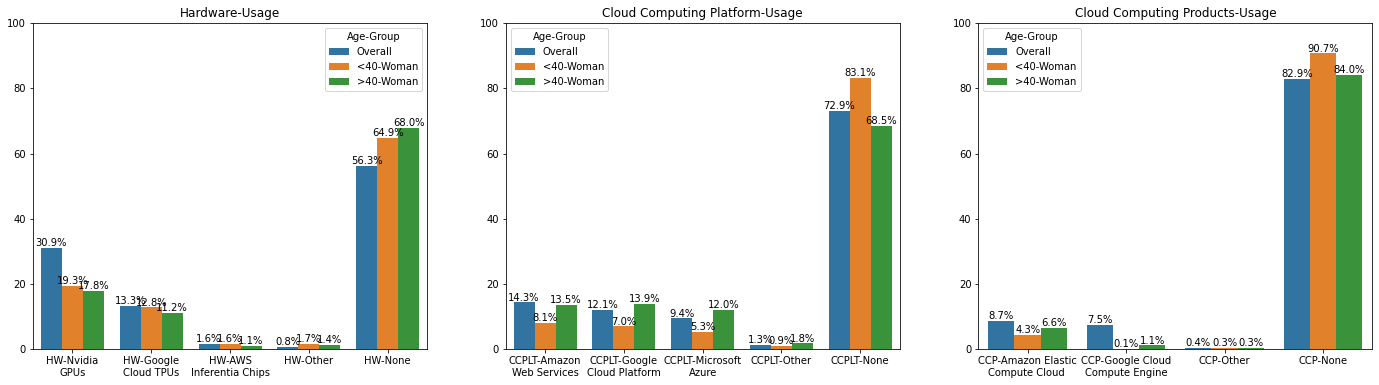

In [32]:
plt.figure(figsize=(24, 6))

ax = plt.subplot(1, 3, 1)
COLS_HW, COLS_HW_TOP3, COLS_HW_OTHER, COLS_HW_NONE = getCols('HW',  'Q12', 'Q12_Part_5', )
df[COLS_HW].head()
summarise(df, df_new, 'HW', COLS_HW, COLS_HW_OTHER, 'Q12_Part_5',
            'Q12_Part_1', 'HW-Nvidia\nGPUs', "NVIDIA GPUs",
            'Q12_Part_2', 'HW-Google\nCloud TPUs', "Google Cloud TPUs",
            'Q12_Part_4', 'HW-AWS\nInferentia Chips', "AWS Inferentia Chips", ax, title="Hardware-Usage")

ax = plt.subplot(1, 3, 2)
CAT = "CCPLT"; COL_NONE = 'Q27_A_Part_11'
COLS, _, COLS_OTHER, _ = getCols(CAT,  'Q27_A', COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            'Q27_A_Part_1', 'CCPLT-Amazon\nWeb Services', "Amazon Web Services (AWS)",
            'Q27_A_Part_3', 'CCPLT-Google\nCloud Platform', "Google Cloud Platform (GCP)",
            'Q27_A_Part_2', 'CCPLT-Microsoft\nAzure', "Microsoft Azure", 
            ax, title="Cloud Computing Platform-Usage")

# TODO: None comes in top 3 so the plot is screwed up   
ax = plt.subplot(1, 3, 3)        
CAT = "CCP"
COL_NONE = 'Q29_A_Part_4'
COLS, _, COLS_OTHER, _ = getCols(CAT,  'Q29_A', COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            'Q29_A_Part_1', 'CCP-Amazon Elastic\nCompute Cloud ', "Amazon Elastic Compute Cloud (EC2)",
            'Q29_A_Part_3', 'CCP-Google Cloud\nCompute Engine', "Google Cloud Compute Engine",
            'Q29_A_Part_3', 'CCP-Google Cloud\nCompute Engine', "Google Cloud Compute Engine",
            ax, title="Cloud Computing Products-Usage") 

Almost similar trend across categories in the Hardware & Cloud technologies as well. The number not using any of these technologies is significantly higher than those who are using specific Harward.

Here again, in the usage of Cloud Computing platforms & products, the **Women > 40 years** have a slight upper hand compared to their **<40 years** counterparts. 

### 5.2 Managed Machine Learning Products, Auto ML Tools, Manage Machine Learning Experiments

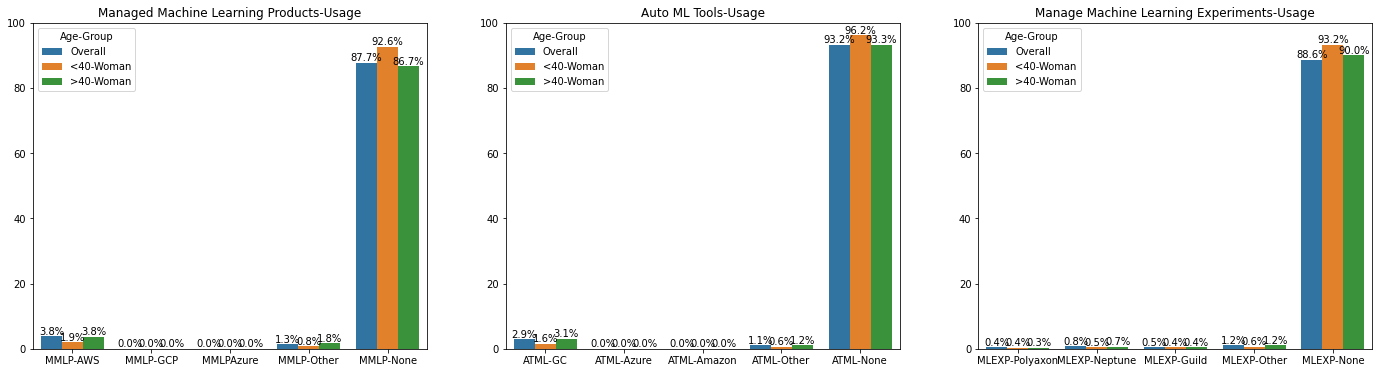

In [33]:
plt.figure(figsize=(24, 6))

ax = plt.subplot(1, 3, 1)
CAT = "MMLP";COL_NONE = 'Q31_A_Part_9'
COLS, _, COLS_OTHER, _ = getCols(CAT,  'Q31_A', COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            'Q31_A_Part_1', 'MMLP-AWS', "Amazon SageMaker",
            'Q31_A_Part_3', 'MMLP-GCP', "Azure Machine Learning Studio",
            'Q31_A_Part_2', 'MMLPAzure', "Databricks", ax, "Managed Machine Learning Products-Usage") 

ax = plt.subplot(1, 3, 2)
CAT = "ATML"; COL_NONE = 'Q37_A_Part_7'
COLS, _, COLS_OTHER, _ = getCols(CAT,  'Q37_A', COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            'Q37_A_Part_1', CAT+ '-' + 'GC', "Google Cloud AutoML",
            'Q37_A_Part_3', CAT+ '-' + 'Azure', "Azure Automated Machine Learning",
            'Q37_A_Part_2', CAT+ '-' + 'Amazon', "Amazon Sagemaker Autopilot", ax, "Auto ML Tools-Usage") 

ax = plt.subplot(1, 3, 3)
CAT = "MLEXP"; COL_NONE = 'Q38_A_Part_11'
COLS, _, COLS_OTHER, _ = getCols(CAT,  'Q37_A', COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            'Q38_A_Part_7', CAT+ '-' + 'Polyaxon', "Polyaxon",
            'Q38_A_Part_1', CAT+ '-' + 'Neptune', "Neptune.ai",
            'Q38_A_Part_6', CAT+ '-' + 'Guild', "Guild.ai", ax, "Manage Machine Learning Experiments-Usage" ) 

The adoption of these higher end platforms is very very less!

### 5.3 Data Storage Products, Big Data Product, Business Intelligence Tools

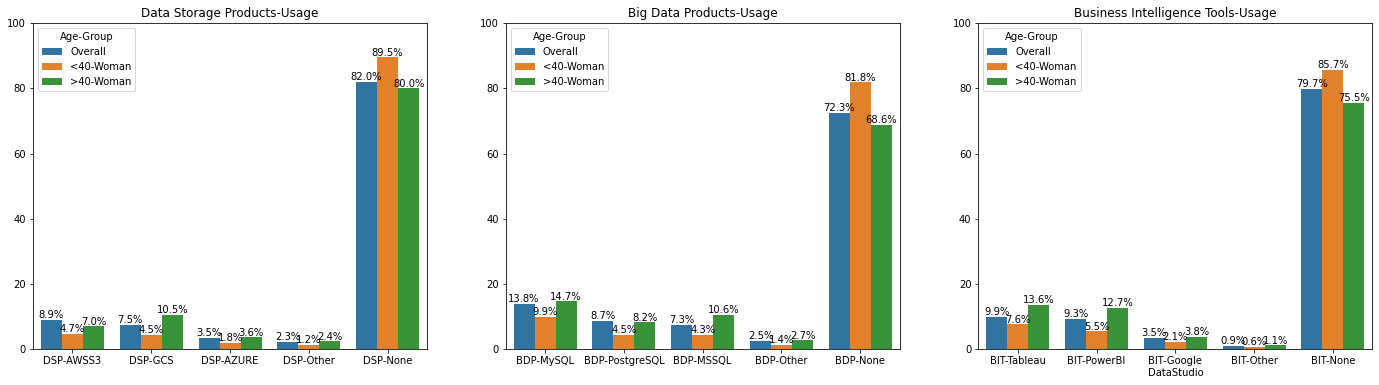

In [34]:
plt.figure(figsize=(24, 6))

ax = plt.subplot(1, 3, 1)
CAT = "DSP"; Q_PREFIX = "Q30_A"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}7'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}3', CAT+ '-' + 'AWSS3', "Amazon Simple Storage Service (S3)",
            f'{Q_PART_PREFIX}5', CAT+ '-' + 'GCS', "Google Cloud Storage (GCS)",
            f'{Q_PART_PREFIX}1', CAT+ '-' + 'AZURE', "Microsoft Azure Data Lake Storage", ax, "Data Storage Products-Usage") 

ax = plt.subplot(1, 3, 2)
CAT = "BDP"; Q_PREFIX = "Q32_A"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}20'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}1', CAT+ '-' + 'MySQL', "MySQL",
            f'{Q_PART_PREFIX}2', CAT+ '-' + 'PostgreSQL', "PostgreSQL",
            f'{Q_PART_PREFIX}8', CAT+ '-' + 'MSSQL', "Microsoft SQL Server", ax, "Big Data Products-Usage") 

ax = plt.subplot(1, 3, 3)
CAT = "BIT"; Q_PREFIX = "Q34_A"
Q_PART_PREFIX = f'{Q_PREFIX}_Part_'; COL_NONE = f'{Q_PART_PREFIX}16'
COLS, _, COLS_OTHER, _ = getCols(CAT, Q_PREFIX, COL_NONE, )
df[COLS].head()
summarise(df, df_new, CAT, COLS, COLS_OTHER, COL_NONE,
            f'{Q_PART_PREFIX}5', CAT+ '-' + 'Tableau', "Tableau",
            f'{Q_PART_PREFIX}2', CAT+ '-' + 'PowerBI', "Microsoft Power BI",
            f'{Q_PART_PREFIX}3', CAT+ '-' + 'Google\nDataStudio', "Google Data Studio", ax, "Business Intelligence Tools-Usage") 

Almost similar trend across categories in the Data & BI Tools. Here again, the number of members who are not using ay of the technologies is much higher than those who are using specific Products/Tools.

In the category of products, the **Women > 40 years** have a significant upper hand compared to their **<40 years** counterparts and in some cases **overall** numbers also.

## 6. Technology Usage - Overall Trends

Let's look at the typical and max usages of the tools, products and platforms across the **overall**, **women<40 years** and **women>40 years** categories

<AxesSubplot:>

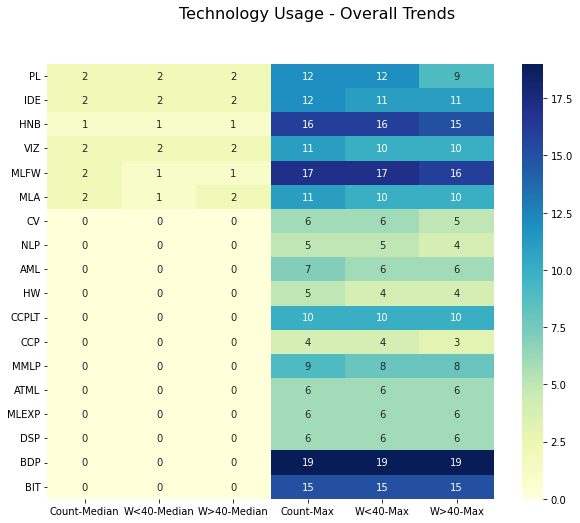

In [35]:
fig=plt.figure(figsize=(10, 8));fig.suptitle('Technology Usage - Overall Trends', fontsize=16)
sns.heatmap(df_RESULT, annot=True, fmt="g", cmap="YlGnBu")

The typical usages for Woman>40 follow a similar trend as the overall and the Woman < 40 categories. 

## End Notes

**Women > 40 years** form a minute 3% sub-group of practioners majoirty of them coming from the **United States of America**

Wrt **Education and Profession**
- ⭐️⭐️⭐️ They have mostly **Masters degree** followed by Doctors, Bachelors, None and then Professional doctorate.
- Higher percentage of them are in the Academics/Education followed by Computers/Technology. 
- ⭐️⭐️⭐️ Most of them are in the Data Scientist and Research Scientist roles
- ⭐️⭐️⭐️ Their salaries are in general higher than their counterparts (owing to their experience)

Let's look at the **Usage of Technology** of this **Women >40 years** category. The usage of technology is a good indicator of Proficiency.
- **Development Toolset/Environment**: Their overall trend of usage of Programming Languages, **IDE** and **Hosted Notebook** usage is similar for the Woman > 40 is similar to **overall** and **Woman <40** categories. 
    - The number of **women > 40** users not using any programming language,IDE and Hosted Notebook is significantly higher than the overall and women<40 category. 
    - ⭐️⭐️⭐️ More percentage of this community has been using programming languages and ML for more years compared to that of their counterparts.
    - In all the categories of gender and age groups, 
        - matplotlib, seaborn, plotly are most used visualization libraries 
        - scikit learn, tensorflow and keras are most used for general machine learning frameworks
- **Machine Learning Concepts, Practices**: The trend of usage of the ML algorithms, CV, NLP & AutoML are again same across all the gender-age group categories. A big percentage of the community have not started to use the higher order ML concepts like CV, NLP & AutoML. 
    - ⭐️⭐️⭐️ Interestingly in the usage of ML Algorithms, the **Women > 40 years** have a slight upper hand compared to their **<40 years** counterparts. 
- **Managed Platforms & Products**: Almost similar trend across categories in the Hardware & Cloud technologies, Data & BI Tools. The adoption of these higher end platforms is very very less! 
    - ⭐️⭐️⭐️ Here again, the **Women > 40 years** have a slight upper hand compared to their **<40 years** counterparts and in some cases **overall** numbers also.

_TODO: If time permits I will continue with the analysis of the "the topics they hope to become more familiar with". This set will indicate the **interest** of the group in the ML & Data science field._  